## Data cleaning

In [1]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in round brackets, remove new line character, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[·–‘’“”…]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

round1 = lambda x: clean_text_round1(x)

In [2]:
def clean_text_round2(text):
    '''Remove imojis'''
    # Mẫu regex để khớp với các emoji dựa trên các mã Unicode
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001FAA0-\U0001FAAF"  # Symbols for Legacy Computing
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

round2 = lambda x: clean_text_round2(x)

In [3]:
def clean_text_round3(text):
    '''Remove chinese chracters'''
    text = re.sub(r'[\u4e00-\u9fff]', '', text)
    return text

round3 = lambda x: clean_text_round3(x)

In [4]:
def clean_text_round4(text):
    '''remove links'''
    # Define a regular expression pattern for matching links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use sub to replace links with an empty string
    cleaned_text = re.sub(link_pattern, '', text)

    return cleaned_text

round4 = lambda x: clean_text_round4(x)

In [5]:
!pip install py_vncorenlp
!mkdir vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4307 sha256=0683a8393f9657ae281c813f82ea33fdd665cb30406fef5de086e4efedbbfb4a
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [6]:
import py_vncorenlp

# Au tomatically download VnCoreNLP components from the original repository
# and save them in some local machine folder
py_vncorenlp.download_model(save_dir='/content/vncorenlp')

# Load the word and sentence segmentation component
rdrsegmenter= py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')

def clean_text_round5(text):
    '''Word segmentation'''
    result = rdrsegmenter.word_segment(str(text))
    if len(result) > 0:
        return result[0]
    else:
        return ''
round5 = lambda x: clean_text_round5(x)

In [7]:
%cd /content
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt

/content
--2023-12-06 09:06:18--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords-dash.txt’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0.001s  

2023-12-06 09:06:18 (13.9 MB/s) - ‘vietnamese-stopwords-dash.txt’ saved [20475/20475]



In [8]:
add_stop_words = ['đi', 'ta', 'hai', 'hàng', 'đầu']

In [9]:
import re

# List of stop words
stop_words = list()
with open('/content/vietnamese-stopwords-dash.txt', 'r') as file:
    lines = file.readlines()
    stop_words = [line.strip() for line in lines]
stop_words.extend(add_stop_words)

def clean_text_round6(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round6 = lambda x: clean_text_round6(x)

In [10]:
def clean_data_r1234(text):
    text_r1 = round1(text)
    text_r2 = round2(text_r1)
    text_r3 = round3(text_r2)
    text_r4 = round4(text_r3)
    return text_r4

In [11]:
def clean_data_r56(text):
    text_r5 = round5(text)
    text_r6 = round5(text_r5)
    return text_r5

In [12]:
# def clean_list_data(texts):
#     cleaned_list_data = [clean_data(text) for text in texts]
#     return cleaned_list_data

## Load from drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


### RNN word2vec

In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/tokenizer_4_class.json' '/content'

In [ ]:
from keras.preprocessing.text import tokenizer_from_json

with open('tokenizer_4_class.json', 'r') as json_file:
    loaded_tokenizer_json = json_file.read()

tokenizer = tokenizer_from_json(loaded_tokenizer_json)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 128
max_length = 512

analyzer = lambda text : text.strip().split(' ')
tokenizer.num_words=vocab_size
tokenizer.split = ' '
tokenizer.oov_token="<OOV>"
tokenizer.analyzer=analyzer

In [ ]:
from keras.models import load_model

# Tải model đã lưu
model = load_model('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/bi_lstm_softmax_4_class.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1387332 (5.29 MB)
Trainable params: 1387332 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### RNN doc2vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec

# load Doc2Vec model
d2v = Doc2Vec.load('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dbow.h5')

In [ ]:
from keras.models import load_model

# Tải model đã lưu
model = load_model('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/bi_lstm_doc2vec_4_class.h5')
model.summary()

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 200)               320800    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 341304 (1.30 MB)
Trainable params: 341304 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
____________

### PhoBERT

In [ ]:
!pip install transformers
!pip3 install tokenizers

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

phobert_v2 = TFAutoModel.from_pretrained("vinai/phobert-base-v2", from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
from keras.models import load_model

# Tải model đã lưu
model = load_model('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/PhoBert_4_class_add_data.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 roberta (TFRobertaMainLaye  TFBaseModelOutputWithPooli   1349982   ['input_ids[0][0]',           
 r)                          ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                       

## Test on new data

In [ ]:
test_data = ['Chính phủ vừa ban hành Nghị quyết phiên họp Chính phủ thường kỳ tháng 6 năm 2023 và Hội nghị trực tuyến Chính phủ với \
địa phương.\nTheo đó, Chính phủ giao Ngân hàng Nhà nước Việt Nam chủ trì, \phối hợp với cơ quan, địa phương thực hiện các giải pháp \
điều hành chính sách tiền tệ chủ động, linh hoạt, nới lỏng phù hợp, kịp thời, hiệu quả, phối hợp đồng bộ, chặt chẽ, hài hòa với chính \
sách tài khóa mở rộng hợp lý, có trọng tâm, trọng điểm, hiệu quả, nhanh chóng, dứt khoát.\nViệc này nhằm ưu tiên tháo gỡ khó khăn cho \
sản xuất kinh doanh, thúc đẩy tăng trưởng gắn với ổn định kinh tế vĩ mô, kiểm soát lạm phát, bảo đảm các cân đối lớn của nền kinh tế \
.\nChính phủ cũng lưu ý, tiếp tục thực hiện các giải pháp đồng bộ, quyết liệt để giảm mặt bằng lãi suất, nhất là giảm lãi suất cho \
vay, phấn đấu giảm ít nhất khoảng từ 1,5 - 2%; nghiên cứu, thực hiện áp dụng đối với cả khoản vay mới và đang còn dư nợ.\nNgân hàng \
Nhà nước Việt Nam xác định hạn mức tăng trưởng tín dụng phù hợp với tình hình thực tiễn (cả năm khoảng 13 - 15%, trường hợp thuận lợi \
thì có thể tăng cao hơn) và công bố ngay bằng biện pháp, hình thức phù hợp, hiệu quả chỉ tiêu tăng trưởng tín dụng cho các ngân hàng \
thương mại đến hết năm 2023, bảo đảm đáp ứng nhu cầu vốn tín dụng cho nền kinh tế.\nCùng với đó là rà soát các điều kiện, tiêu chí \
cho vay để điều chỉnh phù hợp, thuận lợi hơn cho người vay, bảo đảm tăng khả năng tiếp cận tín dụng của doanh nghiệp, người \
dân.\nĐồng thời, tập trung, khẩn trương xử lý các ngân hàng thương mại yếu kém, bảo đảm thanh khoản, an toàn hệ thống, chú trọng xử \
lý nợ xấu; có các giải pháp hiệu quả đẩy mạnh triển khai thực hiện gói tín dụng 40 nghìn tỷ đồng hỗ trợ lãi suất và 120 nghìn tỷ đồng \
cho vay nhà ở xã hội.\nĐấu thầu công khai in sách giáo khoa, không để xảy ra tham nhũng, tiêu cực\nChính phủ yêu cầu Bộ Công Thương kịp \
thời khắc phục những tồn tại, hạn chế trong chỉ đạo, điều hành, bảo đảm cung ứng điện ổn định, liên tục, phục vụ sản xuất, kinh doanh \
của doanh nghiệp và sinh hoạt của người dân, nhất là trong mùa cao điểm nắng nóng.\nBộ Công Thương khẩn trương hoàn thành xây dựng Kế \
hoạch thực hiện Quy hoạch điện VIII, trình Thủ tướng trước ngày 15/7; sớm hoàn thiện cơ chế mua bán điện trực tiếp, cơ chế phát triển \
điện mặt trời áp mái tự sản tự tiêu, thí điểm giao cho các tập đoàn, tổng công ty Nhà nước phát triển điện gió ngoài khơi.\nĐồng thời, \
chủ động nắm chắc tình hình, thực hiện các biện pháp để bảo đảm cung ứng đủ xăng dầu cho thị trường trong nước trong mọi tình \
huống.\nChính phủ yêu cầu Bộ Giáo dục và Đào tạo chủ trì, phối hợp với các cơ quan, địa phương thực hiện hiệu quả công tác tuyển sinh \
đại học; chuẩn bị tốt các điều kiện cho năm học mới 2023 - 2024.\nĐặc biệt là tổ chức đấu thầu công khai in sách giáo khoa, bảo đảm \
không để thiếu sách giáo khoa phục vụ năm học mới, không để xảy ra tham nhũng, tiêu cực trong in ấn, phát hành. Chính phủ giao Phó \
Thủ tướng Trần Hồng Hà trực tiếp theo dõi, chỉ đạo thực hiện công tác này.\nNgoài ra, Chính phủ cũng giao Bộ Nội vụ chủ trì, phối \
hợp với các cơ quan, địa phương: rà soát, phối hợp hoàn thành việc cơ cấu, sắp xếp lại đơn vị sự nghiệp công lập thuộc các bộ, cơ \
quan ngang bộ, cơ quan thuộc Chính phủ; phối hợp cơ quan, địa phương đẩy mạnh tinh giản biên chế gắn với cơ cấu lại đội ngũ theo vị \
trí việc làm và nâng cao chất lượng đội ngũ cán bộ, công chức, viên chức.\nChính phủ yêu cầu khẩn trương hoàn thiện, trình cấp có thẩm \
quyền ban hành quy định về việc khuyến khích cán bộ dám nghĩ, dám làm, dám chịu trách nhiệm vì lợi ích chung...']

In [ ]:
test_data

['Chính phủ vừa ban hành Nghị quyết phiên họp Chính phủ thường kỳ tháng 6 năm 2023 và Hội nghị trực tuyến Chính phủ với địa phương.\nTheo đó, Chính phủ giao Ngân hàng Nhà nước Việt Nam chủ trì, \\phối hợp với cơ quan, địa phương thực hiện các giải pháp điều hành chính sách tiền tệ chủ động, linh hoạt, nới lỏng phù hợp, kịp thời, hiệu quả, phối hợp đồng bộ, chặt chẽ, hài hòa với chính sách tài khóa mở rộng hợp lý, có trọng tâm, trọng điểm, hiệu quả, nhanh chóng, dứt khoát.\nViệc này nhằm ưu tiên tháo gỡ khó khăn cho sản xuất kinh doanh, thúc đẩy tăng trưởng gắn với ổn định kinh tế vĩ mô, kiểm soát lạm phát, bảo đảm các cân đối lớn của nền kinh tế .\nChính phủ cũng lưu ý, tiếp tục thực hiện các giải pháp đồng bộ, quyết liệt để giảm mặt bằng lãi suất, nhất là giảm lãi suất cho vay, phấn đấu giảm ít nhất khoảng từ 1,5 - 2%; nghiên cứu, thực hiện áp dụng đối với cả khoản vay mới và đang còn dư nợ.\nNgân hàng Nhà nước Việt Nam xác định hạn mức tăng trưởng tín dụng phù hợp với tình hình thực 

In [ ]:
test_data = list(map(clean_data_r1234, test_data))
test_data = list(map(clean_data_r56, test_data))
test_data

['chính_phủ vừa ban_hành nghị_quyết phiên họp chính_phủ thường_kỳ tháng năm và hội_nghị trực_tuyến chính_phủ với địa_phương theo đó chính_phủ giao ngân_hàng nhà_nước việt_nam chủ_trì phối_hợp với cơ_quan địa_phương thực_hiện các giải_pháp điều_hành chính_sách tiền_tệ chủ_động linh_hoạt nới lỏng phù_hợp kịp_thời hiệu_quả phối_hợp đồng_bộ chặt_chẽ hài_hoà với chính_sách tài_khoá mở_rộng hợp_lý có trọng_tâm trọng_điểm hiệu_quả nhanh_chóng dứt_khoát việc này nhằm ưu_tiên tháo_gỡ khó_khăn cho sản_xuất kinh_doanh thúc_đẩy tăng_trưởng gắn với ổn_định kinh_tế vĩ_mô kiểm_soát lạm_phát bảo_đảm các cân_đối lớn của nền kinh_tế chính_phủ cũng lưu_ý tiếp_tục thực_hiện các giải_pháp đồng_bộ quyết_liệt để giảm mặt_bằng lãi_suất nhất là giảm lãi_suất cho vay phấn_đấu giảm ít_nhất khoảng từ nghiên_cứu thực_hiện áp_dụng đối_với cả khoản vay mới và đang còn dư_nợ ngân_hàng nhà_nước việt_nam xác_định hạn_mức tăng_trưởng tín_dụng phù_hợp với tình_hình thực_tiễn và công_bố ngay bằng biện_pháp hình_thức phù_h

### RNN word2vec

In [ ]:
test_data = tokenizer.texts_to_sequences(test_data)
padded_test_data = pad_sequences(test_data, maxlen=max_length, truncating='post', padding='post')
print(padded_test_data.shape)

(1, 512)


In [ ]:
import numpy as np

y_pred = model.predict(padded_test_data)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['Fake', 'Real inside fake', 'Real', 'Fake inside real']
y_pred = [classes[i] for i in y_pred]
print(y_pred)

1/1 [==============================] - 5s 5s/step
[[3.2059441e-04 4.5064875e-04 9.9909270e-01 1.3596291e-04]]
[2]
['Real']


### RNN doc2vec

In [ ]:
import numpy as np

test_data = np.array([d2v.infer_vector(doc.split(' ')) for doc in test_data])
test_data = np.reshape(test_data, (test_data.shape[0], 1, test_data.shape[1]))
test_data.shape

(1, 1, 300)

In [ ]:
y_pred = model.predict(test_data)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['True', 'False', 'True-w-false', 'False-w-true']
y_pred = [classes[i] for i in y_pred]
print(y_pred)

1/1 [==============================] - 1s 558ms/step
[[9.9052936e-01 1.5363470e-03 7.5524999e-03 3.8172759e-04]]
[0]
['True']


### PhoBERT

In [ ]:
tokenized_text = tokenizer.encode_plus(
    test_data[0],
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)
X_input_ids = tokenized_text.input_ids
X_attn_masks = tokenized_text.attention_mask
(X_input_ids.shape, X_attn_masks.shape)

(TensorShape([1, 256]), TensorShape([1, 256]))

In [ ]:
a = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}

In [ ]:
import numpy as np

y_pred = model.predict(a)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['Fake', 'Real inside fake', 'Real', 'Fake inside real']
y_pred = [classes[i] for i in y_pred]
print(y_pred)

1/1 [==============================] - 5s 5s/step
[[1.6559399e-05 1.8845352e-05 9.9973744e-01 2.2717759e-04]]
[2]
['Real']


## Explain by LIME (Bi-LSTM)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e5e0938995a6b0c4418d5e3e5e5e4ed4a23fa4a1cab68f10a1cbc6d41e6afe04
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Fake', 'Real inside fake', 'Real', 'Fake inside real'])

In [ ]:
SEP = '_'

def predict_prob(list_samples):
    for i in range(len(list_samples)):
        list_sentence = list_samples[i].split(' ')
        list_sentence = [sentence.replace(SEP, ' ') for sentence in list_sentence]
        list_samples[i] = clean_data_r56(' '.join(list_sentence))

    test_data = tokenizer.texts_to_sequences(list_samples)
    padded_test_data = pad_sequences(test_data, maxlen=max_length, truncating='post', padding='post')

    preds = model.predict(padded_test_data)
    return preds

### real data

In [ ]:
test_data_real = ['Chính phủ vừa ban hành Nghị quyết phiên họp Chính phủ thường kỳ tháng 6 năm 2023 và Hội nghị trực tuyến Chính phủ với \
địa phương.\nTheo đó, Chính phủ giao Ngân hàng Nhà nước Việt Nam chủ trì, \phối hợp với cơ quan, địa phương thực hiện các giải pháp \
điều hành chính sách tiền tệ chủ động, linh hoạt, nới lỏng phù hợp, kịp thời, hiệu quả, phối hợp đồng bộ, chặt chẽ, hài hòa với chính \
sách tài khóa mở rộng hợp lý, có trọng tâm, trọng điểm, hiệu quả, nhanh chóng, dứt khoát.\nViệc này nhằm ưu tiên tháo gỡ khó khăn cho \
sản xuất kinh doanh, thúc đẩy tăng trưởng gắn với ổn định kinh tế vĩ mô, kiểm soát lạm phát, bảo đảm các cân đối lớn của nền kinh tế \
.\nChính phủ cũng lưu ý, tiếp tục thực hiện các giải pháp đồng bộ, quyết liệt để giảm mặt bằng lãi suất, nhất là giảm lãi suất cho \
vay, phấn đấu giảm ít nhất khoảng từ 1,5 - 2%; nghiên cứu, thực hiện áp dụng đối với cả khoản vay mới và đang còn dư nợ.\nNgân hàng \
Nhà nước Việt Nam xác định hạn mức tăng trưởng tín dụng phù hợp với tình hình thực tiễn (cả năm khoảng 13 - 15%, trường hợp thuận lợi \
thì có thể tăng cao hơn) và công bố ngay bằng biện pháp, hình thức phù hợp, hiệu quả chỉ tiêu tăng trưởng tín dụng cho các ngân hàng \
thương mại đến hết năm 2023, bảo đảm đáp ứng nhu cầu vốn tín dụng cho nền kinh tế.\nCùng với đó là rà soát các điều kiện, tiêu chí \
cho vay để điều chỉnh phù hợp, thuận lợi hơn cho người vay, bảo đảm tăng khả năng tiếp cận tín dụng của doanh nghiệp, người \
dân.\nĐồng thời, tập trung, khẩn trương xử lý các ngân hàng thương mại yếu kém, bảo đảm thanh khoản, an toàn hệ thống, chú trọng xử \
lý nợ xấu; có các giải pháp hiệu quả đẩy mạnh triển khai thực hiện gói tín dụng 40 nghìn tỷ đồng hỗ trợ lãi suất và 120 nghìn tỷ đồng \
cho vay nhà ở xã hội.\nĐấu thầu công khai in sách giáo khoa, không để xảy ra tham nhũng, tiêu cực\nChính phủ yêu cầu Bộ Công Thương kịp \
thời khắc phục những tồn tại, hạn chế trong chỉ đạo, điều hành, bảo đảm cung ứng điện ổn định, liên tục, phục vụ sản xuất, kinh doanh \
của doanh nghiệp và sinh hoạt của người dân, nhất là trong mùa cao điểm nắng nóng.\nBộ Công Thương khẩn trương hoàn thành xây dựng Kế \
hoạch thực hiện Quy hoạch điện VIII, trình Thủ tướng trước ngày 15/7; sớm hoàn thiện cơ chế mua bán điện trực tiếp, cơ chế phát triển \
điện mặt trời áp mái tự sản tự tiêu, thí điểm giao cho các tập đoàn, tổng công ty Nhà nước phát triển điện gió ngoài khơi.\nĐồng thời, \
chủ động nắm chắc tình hình, thực hiện các biện pháp để bảo đảm cung ứng đủ xăng dầu cho thị trường trong nước trong mọi tình \
huống.\nChính phủ yêu cầu Bộ Giáo dục và Đào tạo chủ trì, phối hợp với các cơ quan, địa phương thực hiện hiệu quả công tác tuyển sinh \
đại học; chuẩn bị tốt các điều kiện cho năm học mới 2023 - 2024.\nĐặc biệt là tổ chức đấu thầu công khai in sách giáo khoa, bảo đảm \
không để thiếu sách giáo khoa phục vụ năm học mới, không để xảy ra tham nhũng, tiêu cực trong in ấn, phát hành. Chính phủ giao Phó \
Thủ tướng Trần Hồng Hà trực tiếp theo dõi, chỉ đạo thực hiện công tác này.\nNgoài ra, Chính phủ cũng giao Bộ Nội vụ chủ trì, phối \
hợp với các cơ quan, địa phương: rà soát, phối hợp hoàn thành việc cơ cấu, sắp xếp lại đơn vị sự nghiệp công lập thuộc các bộ, cơ \
quan ngang bộ, cơ quan thuộc Chính phủ; phối hợp cơ quan, địa phương đẩy mạnh tinh giản biên chế gắn với cơ cấu lại đội ngũ theo vị \
trí việc làm và nâng cao chất lượng đội ngũ cán bộ, công chức, viên chức.\nChính phủ yêu cầu khẩn trương hoàn thiện, trình cấp có thẩm \
quyền ban hành quy định về việc khuyến khích cán bộ dám nghĩ, dám làm, dám chịu trách nhiệm vì lợi ích chung...']

In [ ]:
a = test_data_real[0].split('.')
num_features = len(a)
a = list(filter(lambda item: item != "", a)) # loại bỏ các phần tử rỗng
for i in range(len(a)):
    a[i] = clean_data_r123(a[i])
    list_item = a[i].split(' ')
    list_item = list(filter(lambda item: item != "", list_item))
    a[i] = SEP.join(list_item)
a = ' '.join(a)
a

'chính_phủ_vừa_ban_hành_nghị_quyết_phiên_họp_chính_phủ_thường_kỳ_tháng_năm_và_hội_nghị_trực_tuyến_chính_phủ_với_địa_phương theo_đó_chính_phủ_giao_ngân_hàng_nhà_nước_việt_nam_chủ_trì_phối_hợp_với_cơ_quan_địa_phương_thực_hiện_các_giải_pháp_điều_hành_chính_sách_tiền_tệ_chủ_động_linh_hoạt_nới_lỏng_phù_hợp_kịp_thời_hiệu_quả_phối_hợp_đồng_bộ_chặt_chẽ_hài_hòa_với_chính_sách_tài_khóa_mở_rộng_hợp_lý_có_trọng_tâm_trọng_điểm_hiệu_quả_nhanh_chóng_dứt_khoát việc_này_nhằm_ưu_tiên_tháo_gỡ_khó_khăn_cho_sản_xuất_kinh_doanh_thúc_đẩy_tăng_trưởng_gắn_với_ổn_định_kinh_tế_vĩ_mô_kiểm_soát_lạm_phát_bảo_đảm_các_cân_đối_lớn_của_nền_kinh_tế chính_phủ_cũng_lưu_ý_tiếp_tục_thực_hiện_các_giải_pháp_đồng_bộ_quyết_liệt_để_giảm_mặt_bằng_lãi_suất_nhất_là_giảm_lãi_suất_cho_vay_phấn_đấu_giảm_ít_nhất_khoảng_từ_nghiên_cứu_thực_hiện_áp_dụng_đối_với_cả_khoản_vay_mới_và_đang_còn_dư_nợ ngân_hàng_nhà_nước_việt_nam_xác_định_hạn_mức_tăng_trưởng_tín_dụng_phù_hợp_với_tình_hình_thực_tiễn_và_công_bố_ngay_bằng_biện_pháp_hình_thức_phù_hợ

In [ ]:
num_features

18

In [ ]:
exp = explainer.explain_instance(a, predict_prob, labels=(0,1,2,3), num_features=num_features, num_samples=500)
exp.available_labels()

16/16 [==============================] - 0s 20ms/step


[0, 1, 2, 3]

In [ ]:
import numpy as np

b = clean_data_r123(test_data_real[0])
b = clean_data_r45(b)

b = tokenizer.texts_to_sequences([b])
padded_b = pad_sequences(b, maxlen=max_length, truncating='post', padding='post')

preds = model.predict(padded_b)

predicted_label = np.argmax(preds)
predicted_label

1/1 [==============================] - 0s 30ms/step


2

In [ ]:
exp.as_list(label=predicted_label)

[('chính_phủ_vừa_ban_hành_nghị_quyết_phiên_họp_chính_phủ_thường_kỳ_tháng_năm_và_hội_nghị_trực_tuyến_chính_phủ_với_địa_phương',
  0.00793464636923379),
 ('ngoài_ra_chính_phủ_cũng_giao_bộ_nội_vụ_chủ_trì_phối_hợp_với_các_cơ_quan_địa_phương_rà_soát_phối_hợp_hoàn_thành_việc_cơ_cấu_sắp_xếp_lại_đơn_vị_sự_nghiệp_công_lập_thuộc_các_bộ_cơ_quan_ngang_bộ_cơ_quan_thuộc_chính_phủ_phối_hợp_cơ_quan_địa_phương_đẩy_mạnh_tinh_giản_biên_chế_gắn_với_cơ_cấu_lại_đội_ngũ_theo_vị_trí_việc_làm_và_nâng_cao_chất_lượng_đội_ngũ_cán_bộ_công_chức_viên_chức',
  0.007862197951056195),
 ('theo_đó_chính_phủ_giao_ngân_hàng_nhà_nước_việt_nam_chủ_trì_phối_hợp_với_cơ_quan_địa_phương_thực_hiện_các_giải_pháp_điều_hành_chính_sách_tiền_tệ_chủ_động_linh_hoạt_nới_lỏng_phù_hợp_kịp_thời_hiệu_quả_phối_hợp_đồng_bộ_chặt_chẽ_hài_hòa_với_chính_sách_tài_khóa_mở_rộng_hợp_lý_có_trọng_tâm_trọng_điểm_hiệu_quả_nhanh_chóng_dứt_khoát',
  0.00742907811705817),
 ('chính_phủ_yêu_cầu_khẩn_trương_hoàn_thiện_trình_cấp_có_thẩm_quyền_ban_hành_quy_định_v

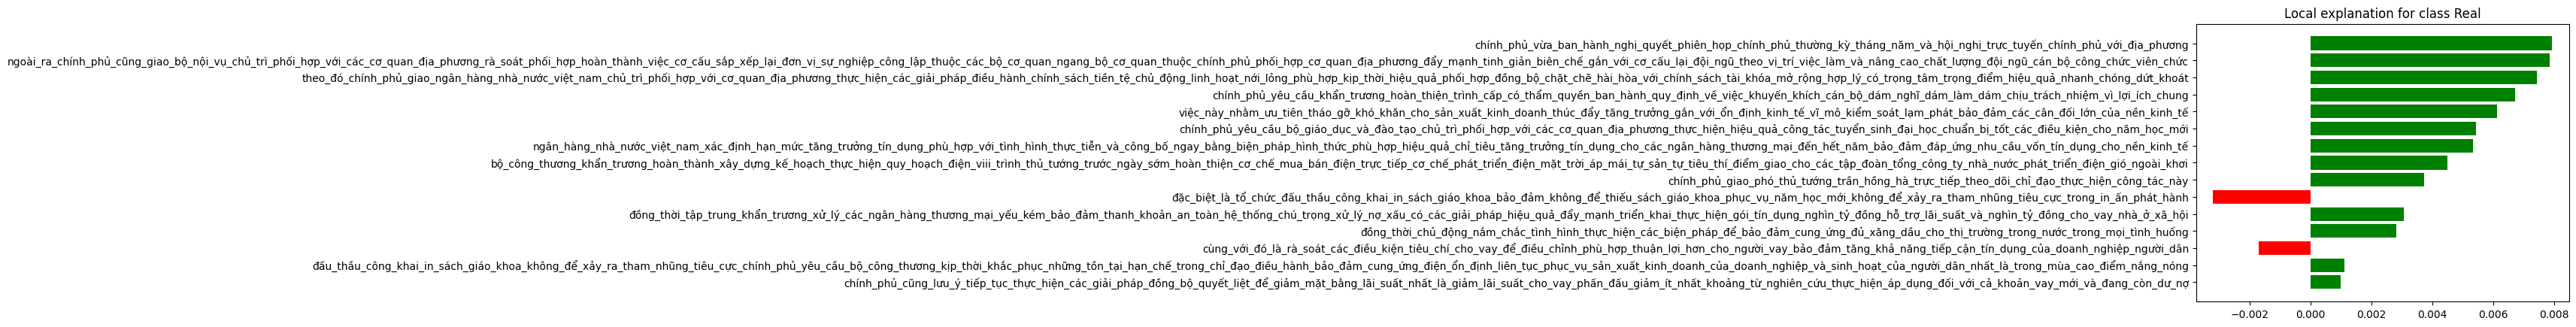

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)

### fake data

In [ ]:
test_data_fake = ['Pháp luật khi bị tha hóa trở thành chiếc máy chém để bảo vệ cái ác, bảo vệ quyền lợi \
của thiểu số cầm quyền thì nó đồng thời tiêu hủy cả Đạo Đức và Công Lý. Đó con đường nhanh nhất để đưa xã hội tới suy vong, quốc gia \
bị hủy hoại.\nPhiên tòa xét xử 29 người dân ở Đồng Tâm vừa qua là một tấn kịch bi thảm, ngập máu và nước mắt của dân oan. Nơi quỉ dữ \
nhân danh “pháp luật” để thi hành thứ “công lý” của chúng. \nNhiều người nói rằng, gốc rễ của vấn đề, căn nguyên của mâu thuẫn xã hội \
ngày càng trở nên gay gắt là do bộ Luật Đất Đai đầy mâu thuẫn, xuất phát từ “mệnh đề” quái gở “Đất đai thuộc sở hữu toàn dân, do dân \
làm chủ và Nhà nước đại diện thống nhất quản lý” được ghi trong Hiến Pháp của CSVN. Theo “định nghĩa” này, thuộc về “toàn dân” tức “không ai cả” và ông chủ \
sở hữu “toàn dân” không có quyền quản lý, định đoạt tài sản của mình. Không những thế, họ còn dung dưỡng gốc rễ của mâu thuẫn và xáo trộn xã hội bằng vô số các nghị định, thông tư, các \
 văn bản dưới luật, trái luật để rồi càng “cải cách” càng rối rắm, càng thụt lùi. Giờ đây, rất nhiều người có thể trả lời được câu hỏi này. Vì rằng, thể chế CSVN muốn duy trì một \
 tình trạng hỗn loạn, một môi trường thuận lợi để nhũng lạm, nhỏ thì ăn cắp, lớn thì ăn cướp. Điều đó đúng, nhưng chưa đủ. Lê Nin nói “người vô sản làm cách mạng, nếu có mất \
 thì chỉ mất xiềng xích nô lệ, nếu thành công thì được cả thế giới.” Quả thực, bằng một cuộc cướp bóc dưới danh nghĩa “cách mạng,” họ \
 có tất cả phú quí, danh vọng. Sau khi đã tắm máu giai cấp tư sản, tri thức, phong kiến, những kẻ bần cố nông năm xưa trở thành tầng \
 lớp “thượng lưu tôn quí” hôm nay. Và để hợp pháp hóa nguồn gốc tài sản ăn cướp được, thì cần phải “đẻ” ra “luật pháp”. Nói như Lâm Bưu (Lin Biao, 1907-1971, cựu nguyên soái, \
 phó thủ tướng kiêm bộ trưởng Bộ Quốc Phòng, phó chủ tịch đảng Cộng Sản Trung Quốc): “Chính quyền là quyền được đàn áp, \
 cưỡng đoạt.”\nĐó chính là tư tưởng cốt lõi của nhà nước cộng sản. Cướp bóc là mục đích, là động lực của “chính quyền cách mạng.” \
 Luật pháp trong thể chế toàn trị là phương tiện của tầng lớp cầm quyền hợp pháp hóa việc cướp bóc và vì vậy nó không thể bị thay \
 đổi trừ phi chính thể chế toàn trị đó hoàn toàn sụp đổ và được thay thế bằng một thể chế thực sự dân chủ.\nMột thể chế độc tài \
 toàn trị đã bị tha hóa thì nó sẽ đẻ ra vô số những bộ luật cướp bóc, dưới muôn vàn hình thức khác nhau như các loại thuế khóa \
 hà khắc, cho phép trưng thu tài sản, thu hồi rẻ mạt cho đến việc cướp bóc trắng trợn bằng vũ lực đẫm máu.\nTừ nhà nước công an \
 trị tới chế độ phát xít mới.']

In [ ]:
a = test_data_fake[0].split('.')
a = list(filter(lambda item: item != "", a)) # loại bỏ các phần tử rỗng
num_features = len(a)
for i in range(len(a)):
    a[i] = clean_data_r1234(a[i])
    list_item = a[i].split(' ')
    list_item = list(filter(lambda item: item != "", list_item))
    a[i] = SEP.join(list_item)
a = ' '.join(a)
a

'pháp_luật_khi_bị_tha_hóa_trở_thành_chiếc_máy_chém_để_bảo_vệ_cái_ác_bảo_vệ_quyền_lợi_của_thiểu_số_cầm_quyền_thì_nó_đồng_thời_tiêu_hủy_cả_đạo_đức_và_công_lý đó_con_đường_nhanh_nhất_để_đưa_xã_hội_tới_suy_vong_quốc_gia_bị_hủy_hoại phiên_tòa_xét_xử_người_dân_ở_đồng_tâm_vừa_qua_là_một_tấn_kịch_bi_thảm_ngập_máu_và_nước_mắt_của_dân_oan nơi_quỉ_dữ_nhân_danh_pháp_luật_để_thi_hành_thứ_công_lý_của_chúng nhiều_người_nói_rằng_gốc_rễ_của_vấn_đề_căn_nguyên_của_mâu_thuẫn_xã_hội_ngày_càng_trở_nên_gay_gắt_là_do_bộ_luật_đất_đai_đầy_mâu_thuẫn_xuất_phát_từ_mệnh_đề_quái_gở_đất_đai_thuộc_sở_hữu_toàn_dân_do_dân_làm_chủ_và_nhà_nước_đại_diện_thống_nhất_quản_lý_được_ghi_trong_hiến_pháp_của_csvn theo_định_nghĩa_này_thuộc_về_toàn_dân_tức_không_ai_cả_và_ông_chủ_sở_hữu_toàn_dân_không_có_quyền_quản_lý_định_đoạt_tài_sản_của_mình không_những_thế_họ_còn_dung_dưỡng_gốc_rễ_của_mâu_thuẫn_và_xáo_trộn_xã_hội_bằng_vô_số_các_nghị_định_thông_tư_các_văn_bản_dưới_luật_trái_luật_để_rồi_càng_cải_cách_càng_rối_rắm_càng_thụt_lùi giờ_

In [ ]:
num_features

20

In [ ]:
exp = explainer.explain_instance(a, predict_prob, labels=(0,1,2,3), num_features=num_features, num_samples=500)
exp.available_labels()

16/16 [==============================] - 0s 22ms/step


[0, 1, 2, 3]

In [ ]:
import numpy as np

b = clean_data_r123(test_data_fake[0])
b = clean_data_r45(b)

b = tokenizer.texts_to_sequences([b])
padded_b = pad_sequences(b, maxlen=max_length, truncating='post', padding='post')

preds = model.predict(padded_b)
print(preds)
predicted_label = np.argmax(preds)
print(predicted_label)

1/1 [==============================] - 0s 26ms/step
[[0.89786595 0.07048232 0.02075428 0.01089746]]
0


In [ ]:
exp.as_list(label=predicted_label)

[('phiên_tòa_xét_xử_người_dân_ở_đồng_tâm_vừa_qua_là_một_tấn_kịch_bi_thảm_ngập_máu_và_nước_mắt_của_dân_oan',
  0.009774089026064548),
 ('pháp_luật_khi_bị_tha_hóa_trở_thành_chiếc_máy_chém_để_bảo_vệ_cái_ác_bảo_vệ_quyền_lợi_của_thiểu_số_cầm_quyền_thì_nó_đồng_thời_tiêu_hủy_cả_đạo_đức_và_công_lý',
  -0.00458677726669365),
 ('nơi_quỉ_dữ_nhân_danh_pháp_luật_để_thi_hành_thứ_công_lý_của_chúng',
  0.002829882825454824),
 ('nhiều_người_nói_rằng_gốc_rễ_của_vấn_đề_căn_nguyên_của_mâu_thuẫn_xã_hội_ngày_càng_trở_nên_gay_gắt_là_do_bộ_luật_đất_đai_đầy_mâu_thuẫn_xuất_phát_từ_mệnh_đề_quái_gở_đất_đai_thuộc_sở_hữu_toàn_dân_do_dân_làm_chủ_và_nhà_nước_đại_diện_thống_nhất_quản_lý_được_ghi_trong_hiến_pháp_của_csvn',
  -0.0018696975901368762),
 ('đó_con_đường_nhanh_nhất_để_đưa_xã_hội_tới_suy_vong_quốc_gia_bị_hủy_hoại',
  0.0016925111471838695),
 ('luật_pháp_trong_thể_chế_toàn_trị_là_phương_tiện_của_tầng_lớp_cầm_quyền_hợp_pháp_hóa_việc_cướp_bóc_và_vì_vậy_nó_không_thể_bị_thay_đổi_trừ_phi_chính_thể_chế_toàn_trị_đó_h

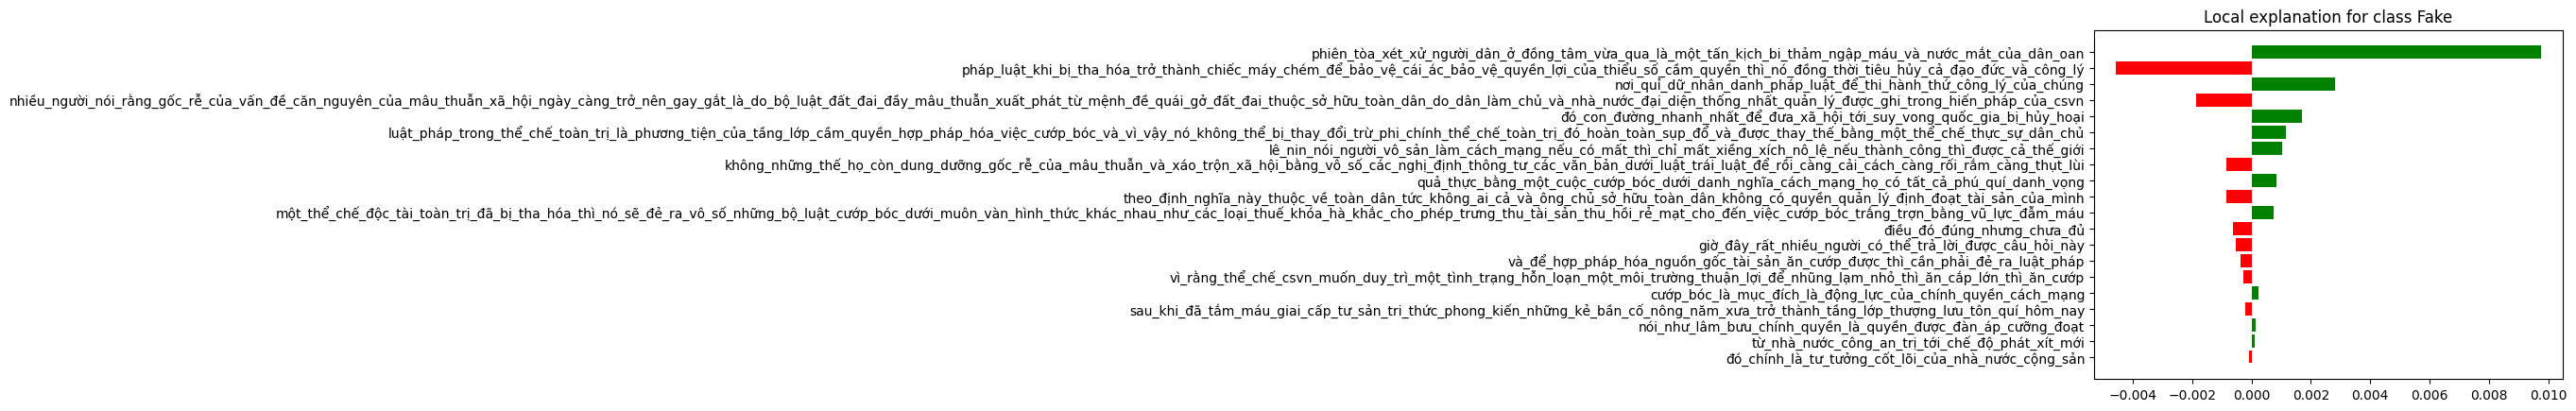

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

ex = exp.as_list(label=predicted_label)
fig = plt.figure(figsize=(15,20))
vals = [x[1] for x in ex]
names = [x[0] for x in ex]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(ex)) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
title = 'Local explanation for class Fake news'
plt.title(title)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)

## Explain by LIME (PhoBERT)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6bff6b6f7e6298a233153e5b4802326bba38109ebc97d47cfa32199ddc3117cf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Fake', 'Real inside fake', 'Real', 'Fake inside real'])

In [ ]:
from tqdm.auto import tqdm

def generate_data(X, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(X)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
SEP = '_'
max_length = 256

def predict_prob(list_samples):
    for i in range(len(list_samples)):
        list_sentence = list_samples[i].split(' ')
        list_sentence = [sentence.replace(SEP, ' ') for sentence in list_sentence]
        list_samples[i] = clean_data_r56(' '.join(list_sentence))

    X_input_ids = np.zeros((len(list_samples), max_length))
    X_attn_masks = np.zeros((len(list_samples), max_length))
    X_input_ids, X_attn_masks = generate_data(list_samples, X_input_ids, X_attn_masks, tokenizer)
    X = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}

    preds = model.predict(X)
    return preds

### real data

In [ ]:
test_data_real = ['Chính phủ vừa ban hành Nghị quyết phiên họp Chính phủ thường kỳ tháng 6 năm 2023 và Hội nghị trực tuyến Chính phủ với \
địa phương.\nTheo đó, Chính phủ giao Ngân hàng Nhà nước Việt Nam chủ trì, \phối hợp với cơ quan, địa phương thực hiện các giải pháp \
điều hành chính sách tiền tệ chủ động, linh hoạt, nới lỏng phù hợp, kịp thời, hiệu quả, phối hợp đồng bộ, chặt chẽ, hài hòa với chính \
sách tài khóa mở rộng hợp lý, có trọng tâm, trọng điểm, hiệu quả, nhanh chóng, dứt khoát.\nViệc này nhằm ưu tiên tháo gỡ khó khăn cho \
sản xuất kinh doanh, thúc đẩy tăng trưởng gắn với ổn định kinh tế vĩ mô, kiểm soát lạm phát, bảo đảm các cân đối lớn của nền kinh tế \
.\nChính phủ cũng lưu ý, tiếp tục thực hiện các giải pháp đồng bộ, quyết liệt để giảm mặt bằng lãi suất, nhất là giảm lãi suất cho \
vay, phấn đấu giảm ít nhất khoảng từ 1,5 - 2%; nghiên cứu, thực hiện áp dụng đối với cả khoản vay mới và đang còn dư nợ.\nNgân hàng \
Nhà nước Việt Nam xác định hạn mức tăng trưởng tín dụng phù hợp với tình hình thực tiễn (cả năm khoảng 13 - 15%, trường hợp thuận lợi \
thì có thể tăng cao hơn) và công bố ngay bằng biện pháp, hình thức phù hợp, hiệu quả chỉ tiêu tăng trưởng tín dụng cho các ngân hàng \
thương mại đến hết năm 2023, bảo đảm đáp ứng nhu cầu vốn tín dụng cho nền kinh tế.\nCùng với đó là rà soát các điều kiện, tiêu chí \
cho vay để điều chỉnh phù hợp, thuận lợi hơn cho người vay, bảo đảm tăng khả năng tiếp cận tín dụng của doanh nghiệp, người \
dân.\nĐồng thời, tập trung, khẩn trương xử lý các ngân hàng thương mại yếu kém, bảo đảm thanh khoản, an toàn hệ thống, chú trọng xử \
lý nợ xấu; có các giải pháp hiệu quả đẩy mạnh triển khai thực hiện gói tín dụng 40 nghìn tỷ đồng hỗ trợ lãi suất và 120 nghìn tỷ đồng \
cho vay nhà ở xã hội.\nĐấu thầu công khai in sách giáo khoa, không để xảy ra tham nhũng, tiêu cực\nChính phủ yêu cầu Bộ Công Thương kịp \
thời khắc phục những tồn tại, hạn chế trong chỉ đạo, điều hành, bảo đảm cung ứng điện ổn định, liên tục, phục vụ sản xuất, kinh doanh \
của doanh nghiệp và sinh hoạt của người dân, nhất là trong mùa cao điểm nắng nóng.\nBộ Công Thương khẩn trương hoàn thành xây dựng Kế \
hoạch thực hiện Quy hoạch điện VIII, trình Thủ tướng trước ngày 15/7; sớm hoàn thiện cơ chế mua bán điện trực tiếp, cơ chế phát triển \
điện mặt trời áp mái tự sản tự tiêu, thí điểm giao cho các tập đoàn, tổng công ty Nhà nước phát triển điện gió ngoài khơi.\nĐồng thời, \
chủ động nắm chắc tình hình, thực hiện các biện pháp để bảo đảm cung ứng đủ xăng dầu cho thị trường trong nước trong mọi tình \
huống.\nChính phủ yêu cầu Bộ Giáo dục và Đào tạo chủ trì, phối hợp với các cơ quan, địa phương thực hiện hiệu quả công tác tuyển sinh \
đại học; chuẩn bị tốt các điều kiện cho năm học mới 2023 - 2024.\nĐặc biệt là tổ chức đấu thầu công khai in sách giáo khoa, bảo đảm \
không để thiếu sách giáo khoa phục vụ năm học mới, không để xảy ra tham nhũng, tiêu cực trong in ấn, phát hành. Chính phủ giao Phó \
Thủ tướng Trần Hồng Hà trực tiếp theo dõi, chỉ đạo thực hiện công tác này.\nNgoài ra, Chính phủ cũng giao Bộ Nội vụ chủ trì, phối \
hợp với các cơ quan, địa phương: rà soát, phối hợp hoàn thành việc cơ cấu, sắp xếp lại đơn vị sự nghiệp công lập thuộc các bộ, cơ \
quan ngang bộ, cơ quan thuộc Chính phủ; phối hợp cơ quan, địa phương đẩy mạnh tinh giản biên chế gắn với cơ cấu lại đội ngũ theo vị \
trí việc làm và nâng cao chất lượng đội ngũ cán bộ, công chức, viên chức.\nChính phủ yêu cầu khẩn trương hoàn thiện, trình cấp có thẩm \
quyền ban hành quy định về việc khuyến khích cán bộ dám nghĩ, dám làm, dám chịu trách nhiệm vì lợi ích chung...']

In [ ]:
a = test_data_real[0].split('.')
num_features = len(a)
a = list(filter(lambda item: item != "", a)) # loại bỏ các phần tử rỗng
for i in range(len(a)):
    a[i] = clean_data_r1234(a[i])
    list_item = a[i].split(' ')
    list_item = list(filter(lambda item: item != "", list_item))
    a[i] = SEP.join(list_item)
a = ' '.join(a)
a

'chính_phủ_vừa_ban_hành_nghị_quyết_phiên_họp_chính_phủ_thường_kỳ_tháng_năm_và_hội_nghị_trực_tuyến_chính_phủ_với_địa_phương theo_đó_chính_phủ_giao_ngân_hàng_nhà_nước_việt_nam_chủ_trì_phối_hợp_với_cơ_quan_địa_phương_thực_hiện_các_giải_pháp_điều_hành_chính_sách_tiền_tệ_chủ_động_linh_hoạt_nới_lỏng_phù_hợp_kịp_thời_hiệu_quả_phối_hợp_đồng_bộ_chặt_chẽ_hài_hòa_với_chính_sách_tài_khóa_mở_rộng_hợp_lý_có_trọng_tâm_trọng_điểm_hiệu_quả_nhanh_chóng_dứt_khoát việc_này_nhằm_ưu_tiên_tháo_gỡ_khó_khăn_cho_sản_xuất_kinh_doanh_thúc_đẩy_tăng_trưởng_gắn_với_ổn_định_kinh_tế_vĩ_mô_kiểm_soát_lạm_phát_bảo_đảm_các_cân_đối_lớn_của_nền_kinh_tế chính_phủ_cũng_lưu_ý_tiếp_tục_thực_hiện_các_giải_pháp_đồng_bộ_quyết_liệt_để_giảm_mặt_bằng_lãi_suất_nhất_là_giảm_lãi_suất_cho_vay_phấn_đấu_giảm_ít_nhất_khoảng_từ_nghiên_cứu_thực_hiện_áp_dụng_đối_với_cả_khoản_vay_mới_và_đang_còn_dư_nợ ngân_hàng_nhà_nước_việt_nam_xác_định_hạn_mức_tăng_trưởng_tín_dụng_phù_hợp_với_tình_hình_thực_tiễn_và_công_bố_ngay_bằng_biện_pháp_hình_thức_phù_hợ

In [ ]:
num_features

18

In [ ]:
exp = explainer.explain_instance(a, predict_prob, labels=(0,1,2,3), num_features=num_features, num_samples=500)
exp.available_labels()

0it [00:00, ?it/s]

16/16 [==============================] - 13s 521ms/step


[0, 1, 2, 3]

In [ ]:
import numpy as np

b = clean_data_r1234(test_data_real[0])
b = clean_data_r56(b)

tokenized_text = tokenizer.encode_plus(
    b,
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)
X_input_ids = tokenized_text.input_ids
X_attn_masks = tokenized_text.attention_mask
a = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}

In [ ]:
import numpy as np

y_pred = model.predict(a)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['Fake', 'Real inside fake', 'Real', 'Fake inside real']
predicted_label = [classes[i] for i in y_pred]
print(predicted_label)

1/1 [==============================] - 0s 69ms/step
[[1.6559399e-05 1.8845352e-05 9.9973744e-01 2.2717759e-04]]
[2]
['Real']


In [ ]:
exp.as_list(label=y_pred[0])

[('theo_đó_chính_phủ_giao_ngân_hàng_nhà_nước_việt_nam_chủ_trì_phối_hợp_với_cơ_quan_địa_phương_thực_hiện_các_giải_pháp_điều_hành_chính_sách_tiền_tệ_chủ_động_linh_hoạt_nới_lỏng_phù_hợp_kịp_thời_hiệu_quả_phối_hợp_đồng_bộ_chặt_chẽ_hài_hòa_với_chính_sách_tài_khóa_mở_rộng_hợp_lý_có_trọng_tâm_trọng_điểm_hiệu_quả_nhanh_chóng_dứt_khoát',
  0.009542468577333355),
 ('việc_này_nhằm_ưu_tiên_tháo_gỡ_khó_khăn_cho_sản_xuất_kinh_doanh_thúc_đẩy_tăng_trưởng_gắn_với_ổn_định_kinh_tế_vĩ_mô_kiểm_soát_lạm_phát_bảo_đảm_các_cân_đối_lớn_của_nền_kinh_tế',
  0.007076691397914768),
 ('chính_phủ_vừa_ban_hành_nghị_quyết_phiên_họp_chính_phủ_thường_kỳ_tháng_năm_và_hội_nghị_trực_tuyến_chính_phủ_với_địa_phương',
  -0.005488455652707786),
 ('đồng_thời_tập_trung_khẩn_trương_xử_lý_các_ngân_hàng_thương_mại_yếu_kém_bảo_đảm_thanh_khoản_an_toàn_hệ_thống_chú_trọng_xử_lý_nợ_xấu_có_các_giải_pháp_hiệu_quả_đẩy_mạnh_triển_khai_thực_hiện_gói_tín_dụng_nghìn_tỷ_đồng_hỗ_trợ_lãi_suất_và_nghìn_tỷ_đồng_cho_vay_nhà_ở_xã_hội',
  -0.0028536891

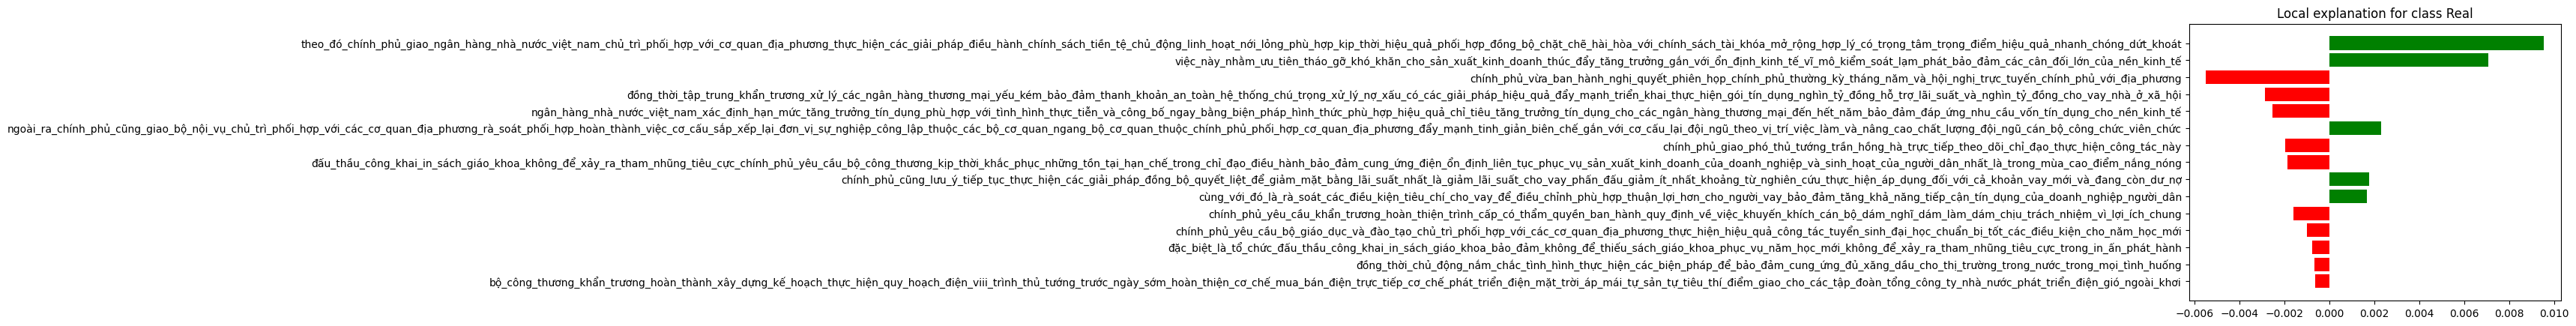

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=y_pred[0])
plt.show()

In [ ]:
exp.show_in_notebook(labels=[y_pred[0]], show_predicted_value=True)

### fake data

In [ ]:
test_data_fake = ['Pháp luật khi bị tha hóa trở thành chiếc máy chém để bảo vệ cái ác, bảo vệ quyền lợi \
của thiểu số cầm quyền thì nó đồng thời tiêu hủy cả Đạo Đức và Công Lý. Đó con đường nhanh nhất để đưa xã hội tới suy vong, quốc gia \
bị hủy hoại.\nPhiên tòa xét xử 29 người dân ở Đồng Tâm vừa qua là một tấn kịch bi thảm, ngập máu và nước mắt của dân oan. Nơi quỉ dữ \
nhân danh “pháp luật” để thi hành thứ “công lý” của chúng. \nNhiều người nói rằng, gốc rễ của vấn đề, căn nguyên của mâu thuẫn xã hội \
ngày càng trở nên gay gắt là do bộ Luật Đất Đai đầy mâu thuẫn, xuất phát từ “mệnh đề” quái gở “Đất đai thuộc sở hữu toàn dân, do dân \
làm chủ và Nhà nước đại diện thống nhất quản lý” được ghi trong Hiến Pháp của CSVN. Theo “định nghĩa” này, thuộc về “toàn dân” tức “không ai cả” và ông chủ \
sở hữu “toàn dân” không có quyền quản lý, định đoạt tài sản của mình. Không những thế, họ còn dung dưỡng gốc rễ của mâu thuẫn và xáo trộn xã hội bằng vô số các nghị định, thông tư, các \
 văn bản dưới luật, trái luật để rồi càng “cải cách” càng rối rắm, càng thụt lùi. Giờ đây, rất nhiều người có thể trả lời được câu hỏi này. Vì rằng, thể chế CSVN muốn duy trì một \
 tình trạng hỗn loạn, một môi trường thuận lợi để nhũng lạm, nhỏ thì ăn cắp, lớn thì ăn cướp. Điều đó đúng, nhưng chưa đủ. Lê Nin nói “người vô sản làm cách mạng, nếu có mất \
 thì chỉ mất xiềng xích nô lệ, nếu thành công thì được cả thế giới.” Quả thực, bằng một cuộc cướp bóc dưới danh nghĩa “cách mạng,” họ \
 có tất cả phú quí, danh vọng. Sau khi đã tắm máu giai cấp tư sản, tri thức, phong kiến, những kẻ bần cố nông năm xưa trở thành tầng \
 lớp “thượng lưu tôn quí” hôm nay. Và để hợp pháp hóa nguồn gốc tài sản ăn cướp được, thì cần phải “đẻ” ra “luật pháp”. Nói như Lâm Bưu (Lin Biao, 1907-1971, cựu nguyên soái, \
 phó thủ tướng kiêm bộ trưởng Bộ Quốc Phòng, phó chủ tịch đảng Cộng Sản Trung Quốc): “Chính quyền là quyền được đàn áp, \
 cưỡng đoạt.”\nĐó chính là tư tưởng cốt lõi của nhà nước cộng sản. Cướp bóc là mục đích, là động lực của “chính quyền cách mạng.” \
 Luật pháp trong thể chế toàn trị là phương tiện của tầng lớp cầm quyền hợp pháp hóa việc cướp bóc và vì vậy nó không thể bị thay \
 đổi trừ phi chính thể chế toàn trị đó hoàn toàn sụp đổ và được thay thế bằng một thể chế thực sự dân chủ.\nMột thể chế độc tài \
 toàn trị đã bị tha hóa thì nó sẽ đẻ ra vô số những bộ luật cướp bóc, dưới muôn vàn hình thức khác nhau như các loại thuế khóa \
 hà khắc, cho phép trưng thu tài sản, thu hồi rẻ mạt cho đến việc cướp bóc trắng trợn bằng vũ lực đẫm máu.\nTừ nhà nước công an \
 trị tới chế độ phát xít mới.']

In [ ]:
a = test_data_fake[0].split('.')
a = list(filter(lambda item: item != "", a)) # loại bỏ các phần tử rỗng
num_features = len(a)
for i in range(len(a)):
    a[i] = clean_data_r1234(a[i])
    list_item = a[i].split(' ')
    list_item = list(filter(lambda item: item != "", list_item))
    a[i] = SEP.join(list_item)
a = ' '.join(a)
a

'pháp_luật_khi_bị_tha_hóa_trở_thành_chiếc_máy_chém_để_bảo_vệ_cái_ác_bảo_vệ_quyền_lợi_của_thiểu_số_cầm_quyền_thì_nó_đồng_thời_tiêu_hủy_cả_đạo_đức_và_công_lý đó_con_đường_nhanh_nhất_để_đưa_xã_hội_tới_suy_vong_quốc_gia_bị_hủy_hoại phiên_tòa_xét_xử_người_dân_ở_đồng_tâm_vừa_qua_là_một_tấn_kịch_bi_thảm_ngập_máu_và_nước_mắt_của_dân_oan nơi_quỉ_dữ_nhân_danh_pháp_luật_để_thi_hành_thứ_công_lý_của_chúng nhiều_người_nói_rằng_gốc_rễ_của_vấn_đề_căn_nguyên_của_mâu_thuẫn_xã_hội_ngày_càng_trở_nên_gay_gắt_là_do_bộ_luật_đất_đai_đầy_mâu_thuẫn_xuất_phát_từ_mệnh_đề_quái_gở_đất_đai_thuộc_sở_hữu_toàn_dân_do_dân_làm_chủ_và_nhà_nước_đại_diện_thống_nhất_quản_lý_được_ghi_trong_hiến_pháp_của_csvn theo_định_nghĩa_này_thuộc_về_toàn_dân_tức_không_ai_cả_và_ông_chủ_sở_hữu_toàn_dân_không_có_quyền_quản_lý_định_đoạt_tài_sản_của_mình không_những_thế_họ_còn_dung_dưỡng_gốc_rễ_của_mâu_thuẫn_và_xáo_trộn_xã_hội_bằng_vô_số_các_nghị_định_thông_tư_các_văn_bản_dưới_luật_trái_luật_để_rồi_càng_cải_cách_càng_rối_rắm_càng_thụt_lùi giờ_

In [ ]:
num_features

20

In [ ]:
exp = explainer.explain_instance(a, predict_prob, labels=(0,1,2,3), num_features=num_features, num_samples=500)
exp.available_labels()

0it [00:00, ?it/s]

16/16 [==============================] - 9s 559ms/step


[0, 1, 2, 3]

In [ ]:
import numpy as np

b = clean_data_r1234(test_data_fake[0])
b = clean_data_r56(b)

tokenized_text = tokenizer.encode_plus(
    b,
    max_length=256,
    truncation=True,
    padding='max_length',
    add_special_tokens=True,
    return_tensors='tf'
)
X_input_ids = tokenized_text.input_ids
X_attn_masks = tokenized_text.attention_mask
a = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}

In [ ]:
import numpy as np

y_pred = model.predict(a)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['Fake', 'Real inside fake', 'Real', 'Fake inside real']
predicted_label = [classes[i] for i in y_pred]
print(predicted_label)

1/1 [==============================] - 0s 86ms/step
[[0.21825556 0.73224366 0.01005007 0.03945073]]
[1]
['Real inside fake']


In [ ]:
exp.as_list(label=y_pred[0])

[('pháp_luật_khi_bị_tha_hóa_trở_thành_chiếc_máy_chém_để_bảo_vệ_cái_ác_bảo_vệ_quyền_lợi_của_thiểu_số_cầm_quyền_thì_nó_đồng_thời_tiêu_hủy_cả_đạo_đức_và_công_lý',
  0.18650222519751286),
 ('nhiều_người_nói_rằng_gốc_rễ_của_vấn_đề_căn_nguyên_của_mâu_thuẫn_xã_hội_ngày_càng_trở_nên_gay_gắt_là_do_bộ_luật_đất_đai_đầy_mâu_thuẫn_xuất_phát_từ_mệnh_đề_quái_gở_đất_đai_thuộc_sở_hữu_toàn_dân_do_dân_làm_chủ_và_nhà_nước_đại_diện_thống_nhất_quản_lý_được_ghi_trong_hiến_pháp_của_csvn',
  0.16227672347093525),
 ('giờ_đây_rất_nhiều_người_có_thể_trả_lời_được_câu_hỏi_này',
  0.10329370430665508),
 ('vì_rằng_thể_chế_csvn_muốn_duy_trì_một_tình_trạng_hỗn_loạn_một_môi_trường_thuận_lợi_để_nhũng_lạm_nhỏ_thì_ăn_cắp_lớn_thì_ăn_cướp',
  0.09730894072963832),
 ('theo_định_nghĩa_này_thuộc_về_toàn_dân_tức_không_ai_cả_và_ông_chủ_sở_hữu_toàn_dân_không_có_quyền_quản_lý_định_đoạt_tài_sản_của_mình',
  0.07143306970727013),
 ('lê_nin_nói_người_vô_sản_làm_cách_mạng_nếu_có_mất_thì_chỉ_mất_xiềng_xích_nô_lệ_nếu_thành_công_thì_được_

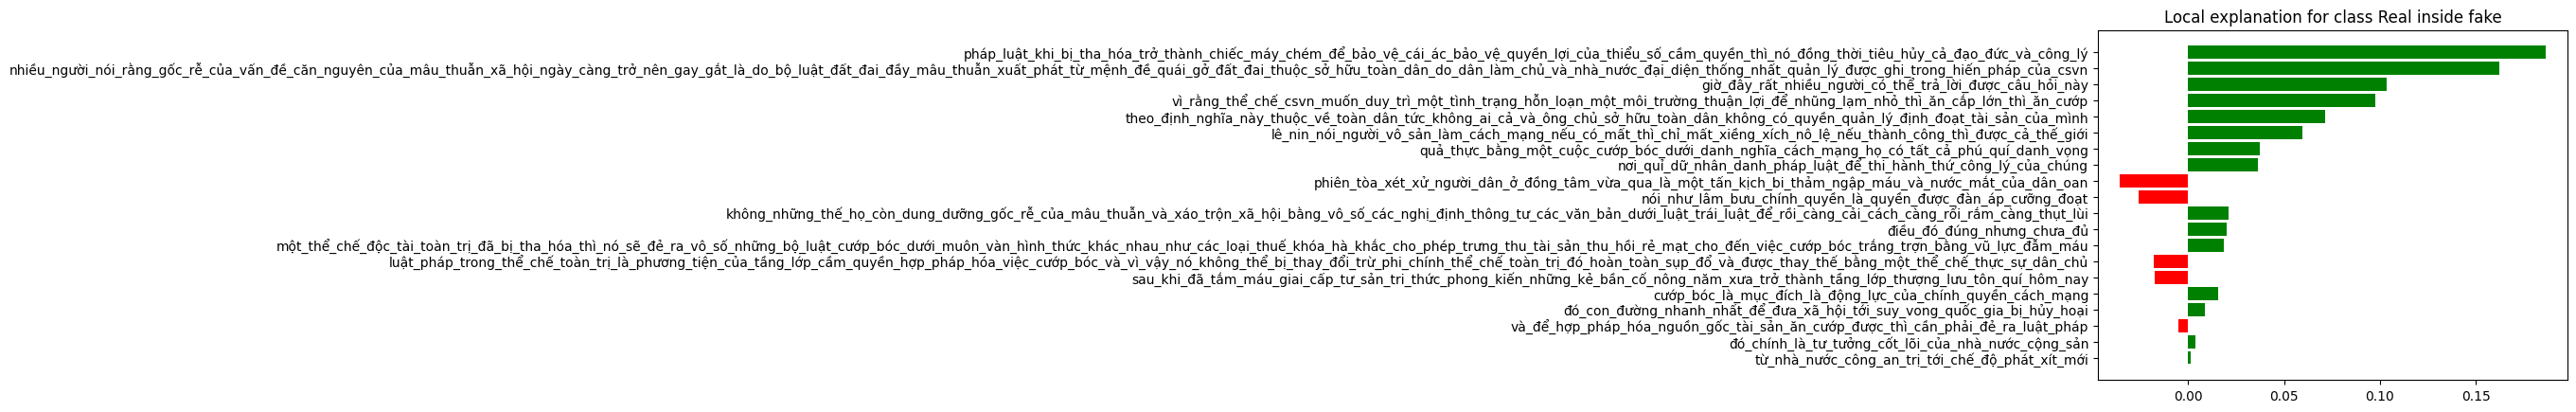

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=y_pred[0])
plt.show()

In [ ]:
exp.show_in_notebook(labels=[y_pred[0]], show_predicted_value=True)

## Explain by Shapley Values
* https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-shapley-values
* https://christophm.github.io/interpretable-ml-book/shapley.html#shapley
* https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html

In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/data_clean.pkl' '/content'

In [ ]:
import pandas as pd

data = pd.read_pickle('/content/data_clean.pkl')
data

Title  \
0     Hà Nội hỗ trợ các nạn nhân vụ cháy chung cư mi...   
1     Vĩnh Phúc: Tạo điều kiện tối đa, không làm lỡ ...   
2     Thủ tướng gặp Tổng Thư ký Liên hợp quốc và ông...   
3     Sàn chứng khoán New York sôi động sau tiếng ch...   
4     Các giáo sư, chuyên gia kinh tế Mỹ "hiến kế" g...   
...                                                 ...   
8134  NHẬN XÉT CỦA TRUMP CÓ THỂ CẢN TRỞ VIỆC DẪN ĐỘ ...   
8135  HẠ VIỆN MỸ THÔNG QUA DỰ LUẬT MỞ LẠI CHÍNH PHỦ,...   
8136   THIÊN HẠ LUẬN GÌ VỀ VENEZUELA ? (Thiên Hạ Luận)    
8137  THÔNG CÁO BÁO CHÍ SỐ 2 CỦA NHÓM LUẬT SƯ ĐẠI DI...   
8138  TT TRUMP TUYÊN BỐ TẠM NGƯNG ĐÓNG CỬA CHÍNH PHỦ...   

                                                Content  Label  
0     tại kỳ họp chuyên_đề của hđnd tp hà_nội sáng c...      1  
1     ubnd tỉnh vĩnh phúc vừa chỉ_đạo các sở ngành đ...      1  
2     cuộc gặp giữa người đứng đầu chính_phủ việt_na...      1  
3     sàn chứng_khoán new york sôi_động sau tiếng ch...      1  
4     thúc_đẩy tăng_trưởng và phát_triển bền_vững tr...      1  
...                                                 ...    ...  
8134  theo nhà ngoại_giao hàng_đầu canada tại bắc ki...      0  
8135  hạ_viện thông_qua dự_luật vài giờ sau khi thượ...      0  
8136  không phải tự_nhiên mà người việt dành cho quố...      0  
8137  nhóm luật_sư lộc hưng gồm những luật_sư trợ_gi...      0  
8138  january tổng_thống trump cho biết thỏa_thuận đ...      0  

[8139 rows x 3 columns]

In [ ]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffled

Title  \
0     Xử lý hình sự 31 cán bộ diện Trung ương quản l...   
1                           Sẽ thí điểm tập sự lãnh đạo   
2     Nguyên Phó Thủ tướng Vũ Khoan: Bản lĩnh, thông...   
3     Thủ tướng bổ nhiệm Phó Tổng Giám đốc Thông tấn...   
4     Bỏ đề xuất không lấy phiếu tín nhiệm người chữ...   
...                                                 ...   
8134  ỦNG HỘ TÙ NHÂN LƯƠNG TÂM TUYỆT THỰC, GIỚI HOẠT...   
8135  HƯỚNG TỚI BẦU CỬ 2021 : PHẢI TỰ DO & CÔNG BẰNG...   
8136  Thủ tướng chủ trì phiên họp Chính phủ thường k...   
8137     ĐIỂM TIN THỨ BA 19/2/2019 (Tin Tức Hàng Ngày)    
8138     ĐIỂM TIN THỨ SÁU 8/3/2019 (Tin Tức Hàng Ngày)    

                                                Content  Label  
0     tại phiên họp ban chỉ_đạo đã thảo_luận cho ý_k...      1  
1     bộ nội_vụ sẽ hoàn_thiện đề_án thí_điểm thực_hi...      1  
2     lts nguyên phó thủ_tướng vũ khoan đã từ_trần v...      1  
3     theo nghị_định của chính_phủ quy_định chức_năn...      1  
4     chiều với đa_số đại_biểu quốc_hội tán_thành qu...      1  
...                                                 ...    ...  
8134  cụ_thể vụ tấn_công hành_hung xả ra vào lúc hơn...      0  
8135  nếu không có gì thay_đổi thì hai năm nữa vào n...      0  
8136  phát_biểu khai_mạc phiên họp thủ_tướng phạm mi...      1  
8137                                                  ·      0  
8138  · vntb khá bất_ngờ khi được biết đây là số tiề...      0  

[8139 rows x 3 columns]

In [ ]:
sentences = list(data_shuffled['Content'])
labels = list(data_shuffled['Label'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[0])

[207, 200, 310, 22, 25, 7, 199, 2841, 287, 296, 309, 160, 71, 301, 171, 165, 232, 259, 117, 482, 47, 2438, 42, 81, 13, 199, 242, 16, 745, 3341, 22, 25, 785, 1430, 735, 242, 402, 363, 157, 250, 504, 2094, 670, 1047, 3039, 2617, 53, 2, 5, 884, 354, 253, 1082, 312, 96, 1, 2050, 10, 7, 201, 5862, 3, 207, 640, 63, 879, 423, 2644, 175, 1431, 127, 33, 134, 2078, 1182, 18, 670, 10, 1559, 391, 22, 25, 344, 61, 63, 18, 670, 370, 162, 85, 1, 213, 18, 7, 3110, 50, 37, 224, 82, 46, 18, 47, 473, 23, 9796, 2756, 23, 93, 10, 136, 18, 670, 344, 1058, 2, 1338, 23, 20, 8, 100, 627, 46, 18, 47, 1721, 16, 22, 25, 200, 11, 22, 7, 199, 402, 363, 157, 122, 5863, 38, 168, 233, 200, 11, 136, 182, 287, 296, 309, 200, 54, 22, 287, 296, 309, 402, 363, 157, 997, 247, 1299, 331, 18, 284, 10, 16, 880, 18, 668, 46, 1427, 993, 352, 2193, 73, 715, 297, 3504, 2, 10, 12, 2757, 1322, 459, 2842, 2, 3784, 287, 296, 309, 16, 1272, 23, 2933, 1, 482, 402, 363, 157, 402, 363, 157, 402, 363, 157, 200, 1517, 287, 296, 309, 16, 18,

In [ ]:
padded_X_train = pad_sequences(X_train, maxlen=max_length, truncating='post', padding="post")
padded_X_train

array([[ 207,  200,  310, ...,    0,    0,    0],
       [2000,   39,  327, ...,   42,  230,  274],
       [ 809,   24,   12, ...,    0,    0,    0],
       ...,
       [  33,  195,   16, ...,    0,    0,    0],
       [   7,  561, 4636, ...,  296,  421,   44],
       [ 160, 2669,  415, ..., 1825,   47, 8592]], dtype=int32)

In [ ]:
padded_X_train.shape

(6511, 512)

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
padded_X_test = pad_sequences(X_test, maxlen=max_length, truncating='post', padding='post')
padded_X_test.shape

(1628, 512)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
import numpy as np

y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]
(y_train.shape, y_test.shape)

((6511, 2), (1628, 2))

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.8 MB/s eta 0:00:00


In [ ]:
# import shap

# # Tạo Explainer
# explainer = shap.Explainer(model, padded_X_train[:10])

# # Tính toán Shapley Values
# shap_values = explainer([padded_X_test[0]], max_evals=2*max_length+1)

# # Vẽ biểu đồ Shapley Values
# shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs()

In [ ]:
import shap
import tensorflow as tf

# Tạo một tầng đối tượng phản hồi
def get_output_layer(model, layer_name):
    return model.get_layer(layer_name).output

# Tạo một mô hình Keras chứa tất cả các lớp cho đến lớp đầu ra cần giải thích
model_for_explanation = tf.keras.Model(inputs=model.inputs, outputs=get_output_layer(model, 'dense_5'))

# Tạo Explainer
explainer = shap.Explainer(model, padded_X_train[:10])  # X_train là dữ liệu huấn luyện của bạn

# Tính toán Shapley Values
shap_values = explainer.shap_values(padded_X_test[:2])

# Vẽ biểu đồ Shapley Values
shap.summary_plot(shap_values, padded_X_test[:2])

InternalError: ignored

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
x_test[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,   591,   202,    14,    31,     6,
         717,    10,    10, 18142, 10698,     5,     4,   360,     7,
           4,   177,  5760,   394,   354,     4,   123,     9,  1035,
        1035,  1035,    10,    10,    13,    92,   124,    89,   488,
        7944,   100,    28,  1668,    14,    31,    23,    27,  7479,
          29,   220,   468,     8,   124,    14,   286,   170,     8,
         157,    46,     5,    27,   239,    16,   179, 15387,    38,
          32,    25,  7944,   451,   202,    14,     6,   717],
      dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Train...")
model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_split=0.3)
# score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
# print("Test score:", score)
# print("Test accuracy:", acc)

Train...
547/547 [==============================] - 223s 390ms/step - loss: 0.4608 - accuracy: 0.7775 - val_loss: 0.3987 - val_accuracy: 0.8247


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
background.shape

(100, 80)

In [ ]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, background)

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test[:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


TypeError: ignored

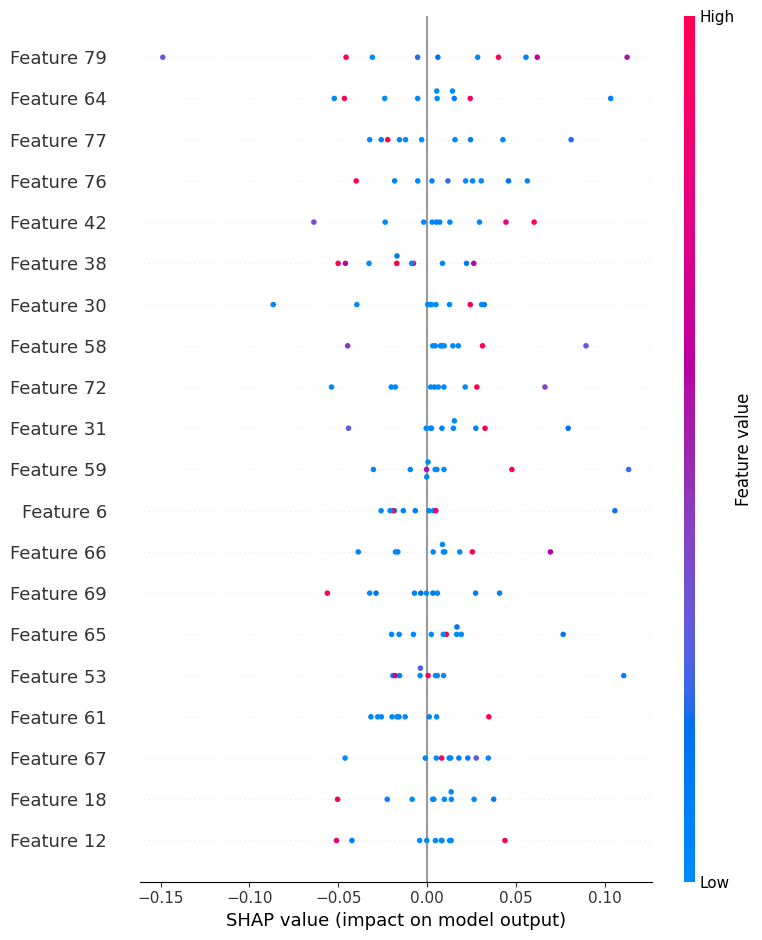

In [ ]:
shap.summary_plot(shap_values, x_test[:10])

In [ ]:
# init the JS visualization code
shap.initjs()

# transform the indexes to words
import numpy as np

words = imdb.get_word_index()
num2word = {}
for w in words.keys():
    num2word[words[w]] = w
x_test_words = np.stack(
    [
        np.array(list(map(lambda x: num2word.get(x, "NONE"), x_test[i])))
        for i in range(10)
    ]
)

# plot the explanation of the first prediction
# Note the model is "multi-output" because it is rank-2 but only has one column
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test_words[0])

1641221/1641221 [==============================] - 0s 0us/step


AttributeError: ignored